In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import session_info
from sklearn.preprocessing import LabelEncoder


In [2]:
%matplotlib inline

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

session_info.show()

In [3]:
%run pandas-missing-extension.ipynb

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Clean the data

### Train data

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

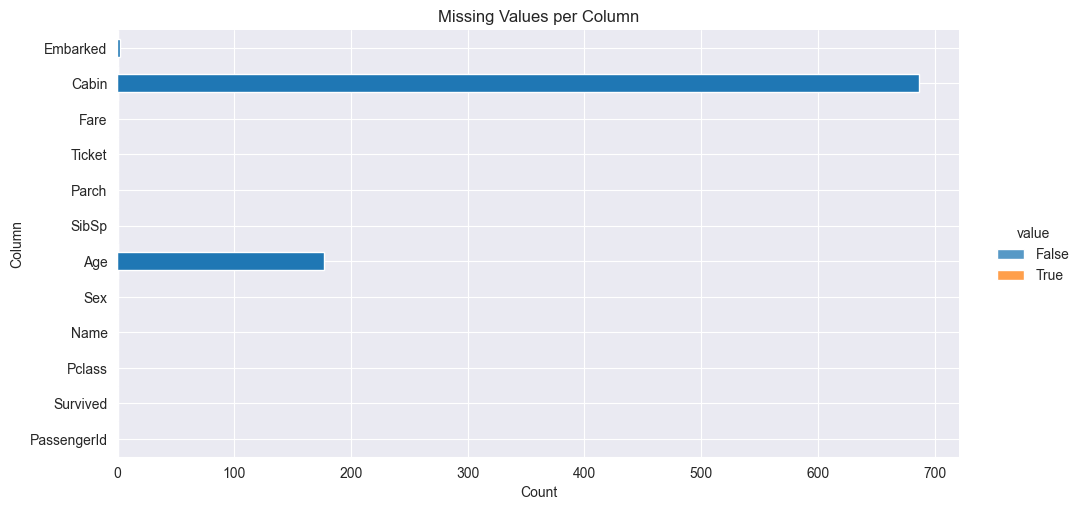

In [8]:
(
    train
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
)

train.isnull().sum().plot.barh()
# titanic.isnull().sum().plot.barh().invert_yaxis()

plt.title('Missing Values per Column')
plt.xlabel('Count')
plt.ylabel('Column')

plt.show()

#### Embarked

In [9]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
train.Embarked.isna().sum()

2

In [11]:
train.Embarked.fillna('S', inplace=True)

In [12]:
train.Embarked.isna().sum()

0

#### Age

In [13]:
train.Age.isna().sum()

177

In [14]:
train.Age.mean()

29.69911764705882

In [15]:
train.Age.fillna(train.Age.mean(), inplace=True)

In [16]:
train.Age.isna().sum()

0

#### Cabin

In [17]:
train.Cabin.isna().sum()

687

In [18]:
del train['Cabin']

#### Drop columns not needed

In [19]:
del train['Name']
del train['Ticket']
del train['PassengerId']

In [20]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
train.shape

(891, 8)

### Test data

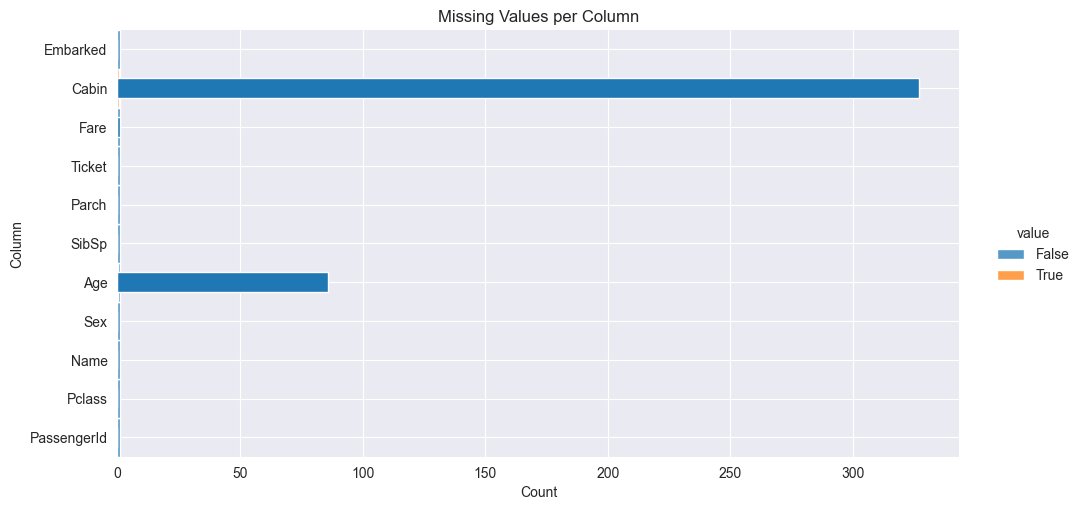

In [22]:
(
    test
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
)

test.isnull().sum().plot.barh()
# titanic.isnull().sum().plot.barh().invert_yaxis()

plt.title('Missing Values per Column')
plt.xlabel('Count')
plt.ylabel('Column')

plt.show()


In [23]:
test.shape

(418, 11)

In [24]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Age

In [25]:
test.Age.fillna(train.Age.mean(), inplace=True)

In [26]:
test.Age.isna().sum()

0

#### Fare

In [27]:
test.Fare.mean()

35.627188489208635

In [28]:
test.Fare.fillna(test.Fare.mean(), inplace=True)

## Pre processing

### Train data

In [29]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
le = LabelEncoder()
train['Sex_encoder'] = le.fit_transform(train['Sex'])
train.Sex_encoder.value_counts()

1    577
0    314
Name: Sex_encoder, dtype: int64

In [31]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoder
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


## Analysis Univariate

In [32]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Sex_encoder'],
      dtype='object')

### Survived

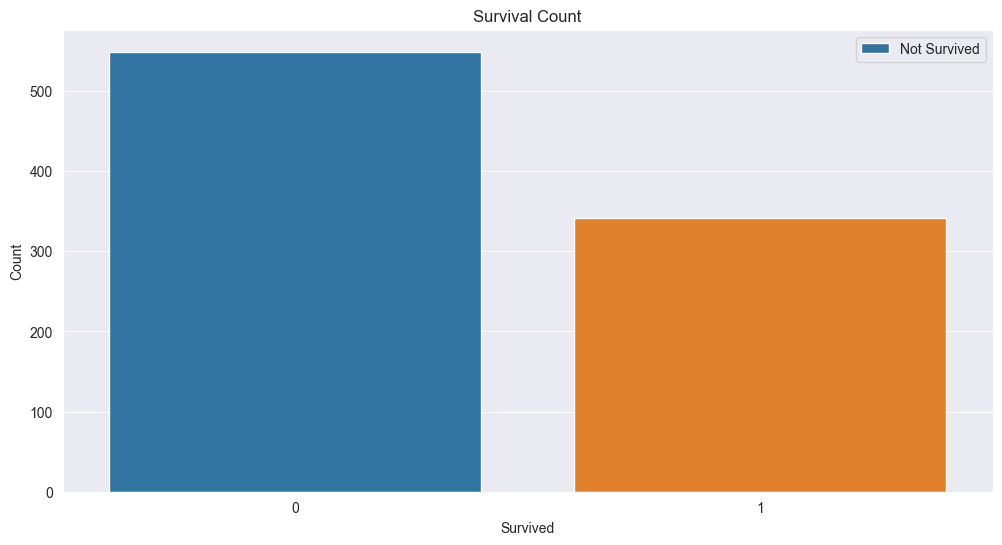

In [35]:
(
    sns.countplot(
        data=train,
        x='Survived',
    )
)

plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.legend(labels=['Not Survived', 'Survived'])

plt.show()

### Pclass

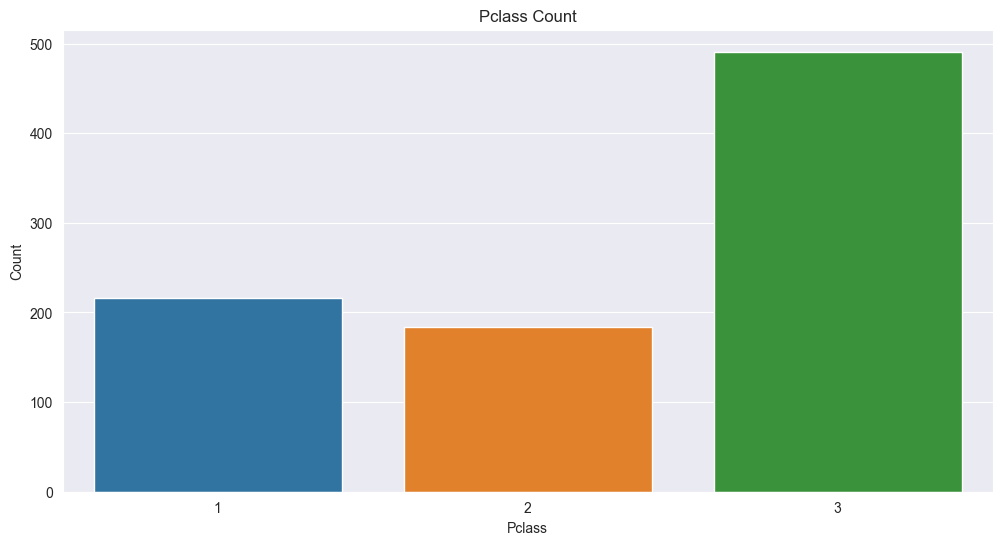

In [38]:
(
    sns.countplot(
        data=train,
        x='Pclass',
        # hue='Survived'
    )
)

plt.title('Pclass Count')
plt.xlabel('Pclass')
plt.ylabel('Count')

plt.show()

### Sex

Text(0.5, 1.0, 'Sex Count')

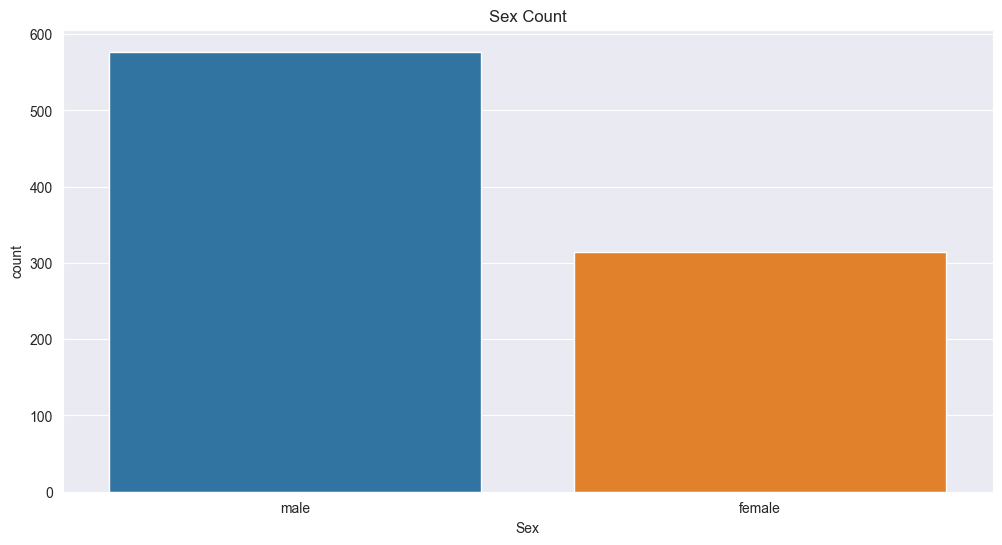

In [40]:
(
    sns.countplot(
        data=train,
        x='Sex'    
    )
)

plt.title('Sex Count')


### Age

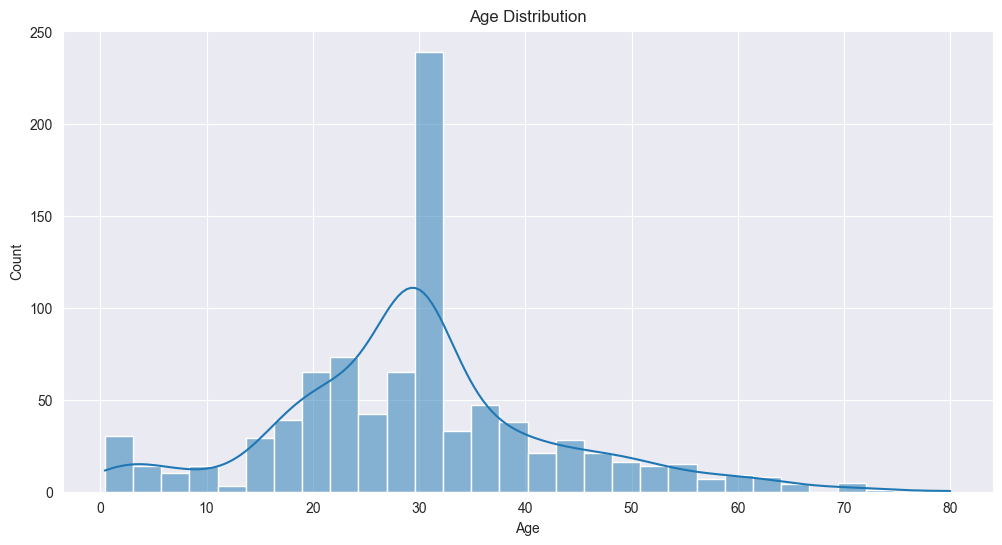

In [48]:
(
    sns.histplot(
        data=train,
        x='Age',
        bins=30,
        # binwidth=2,
        kde=True
    )
)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

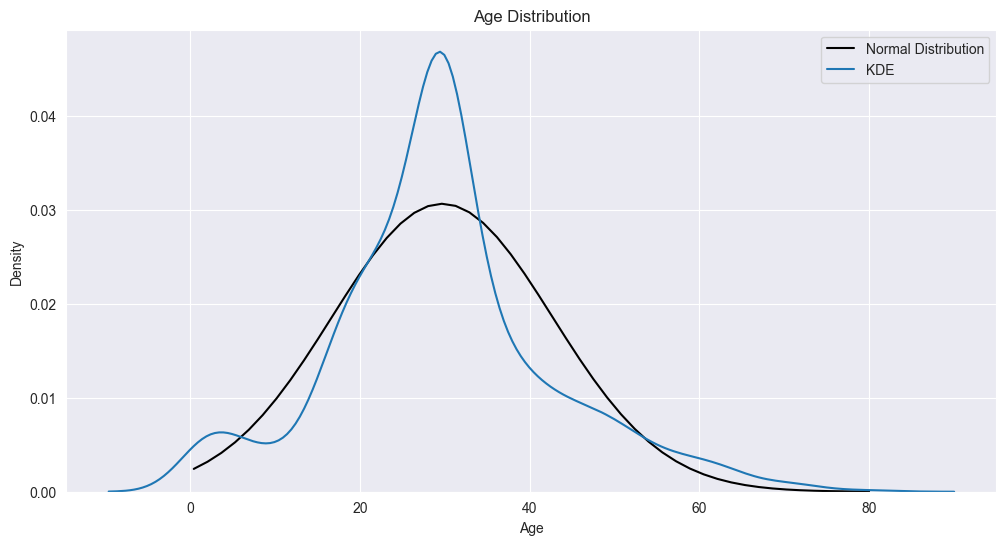

In [68]:
xs = np.linspace(train.Age.min(), train.Age.max())
ys = stats.norm.pdf(xs, train.Age.mean(), train.Age.std())

plt.plot(
    xs,
    ys,
    color='black',
    label='Normal Distribution'
)

sns.kdeplot(
    data=train,
    x='Age',
    label='KDE'
)

plt.title('Age Distribution')
plt.xlabel('Age')

plt.legend()

plt.show()

In [49]:
train.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [52]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Sex_encoder'],
      dtype='object')

### SibSp

**sibsp**: 	# of siblings / spouses aboard the Titanic

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


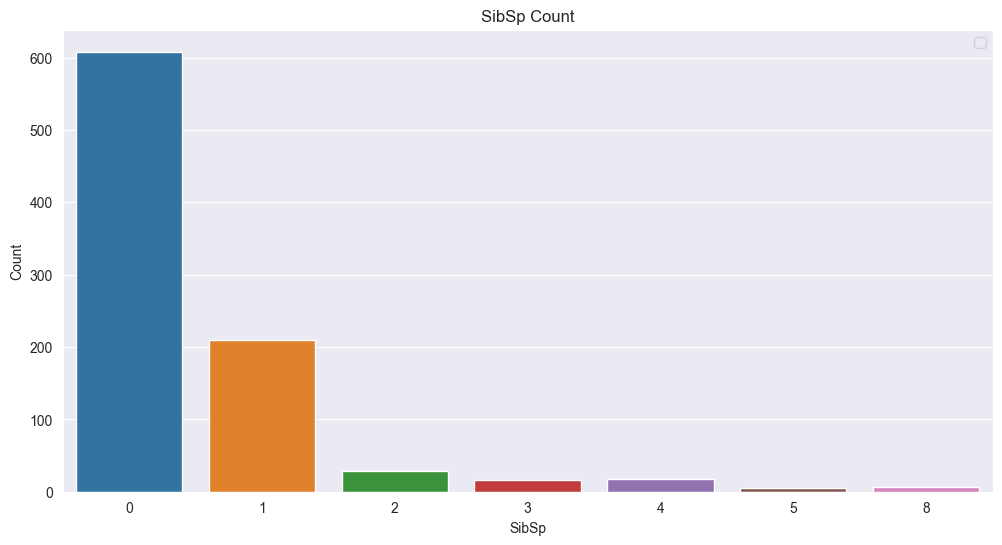

In [56]:
(
    sns.countplot(
        data=train,
        x='SibSp',
    )
)

plt.title('SibSp Count')
plt.xlabel('SibSp')
plt.ylabel('Count')

plt.legend()

plt.show()

### Parch

Parch: # of parents / children aboard the Titanic	

In [57]:
train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

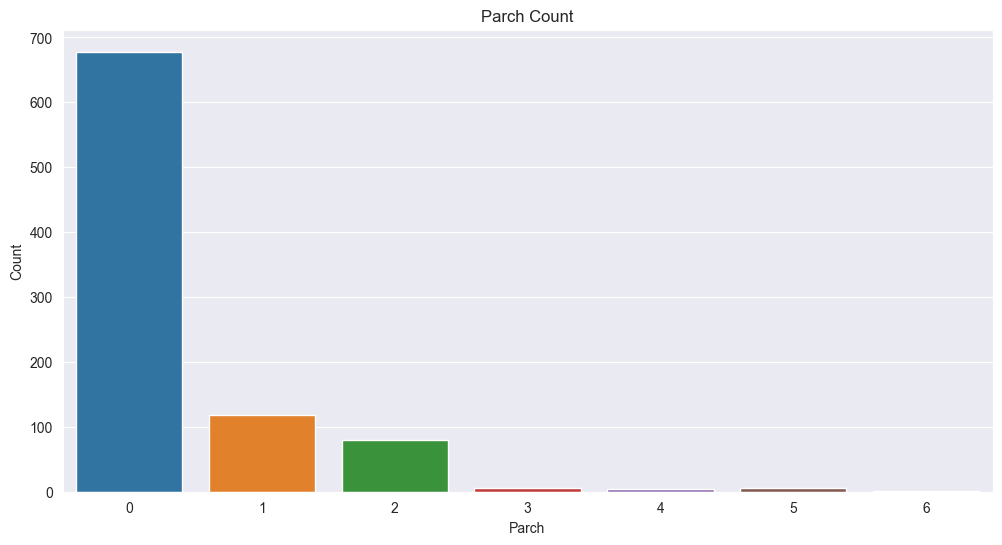

In [58]:
(
    sns.countplot(
        data=train,
        x='Parch',
    )
)

plt.title('Parch Count')
plt.xlabel('Parch')
plt.ylabel('Count')

plt.show()

### Fare

<AxesSubplot: xlabel='Fare', ylabel='Count'>

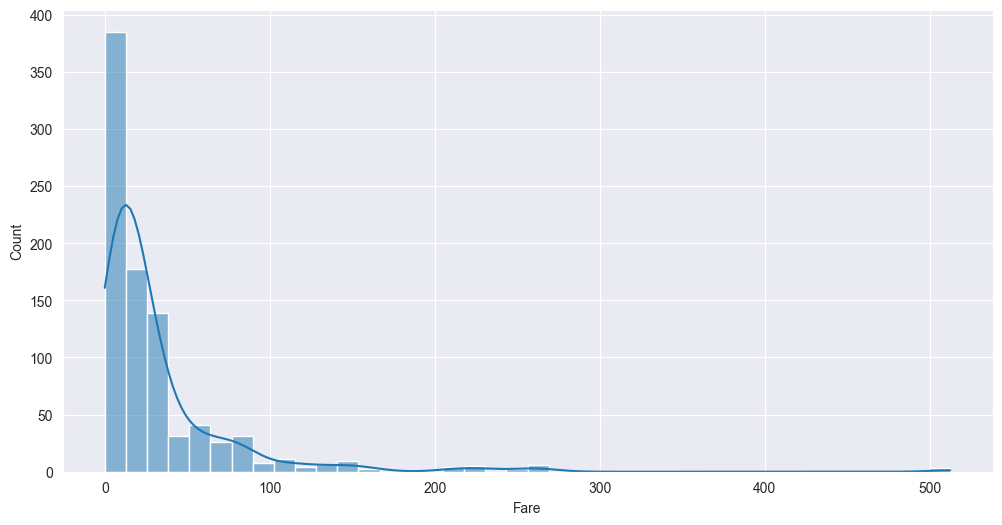

In [62]:
(
    sns.histplot(
        data=train,
        x='Fare',
        bins=40,
        kde=True
    )
)

In [63]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Embarked

	C = Cherbourg, Q = Queenstown, S = Southampton

<AxesSubplot: xlabel='Embarked', ylabel='count'>

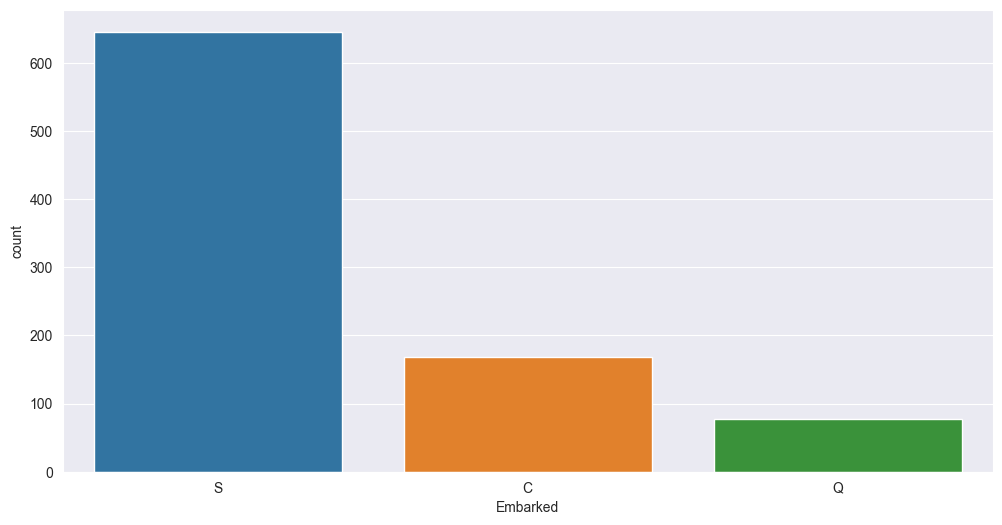

In [65]:
(
    sns.countplot(
        data=train,
        x='Embarked',
    )
)

## Analysis Bivariate

C:\Users\erik1\AppData\Local\Temp\ipykernel_12720\113676371.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=train.corr(),


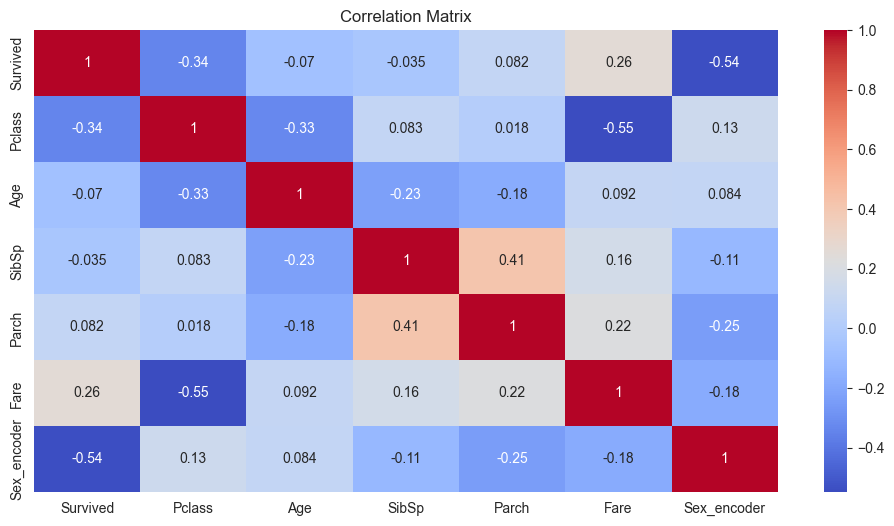

In [73]:
(
    sns.heatmap(
        data=train.corr(),
        annot=True,
        cmap='coolwarm'
    )
)

plt.title('Correlation Matrix')

plt.show()

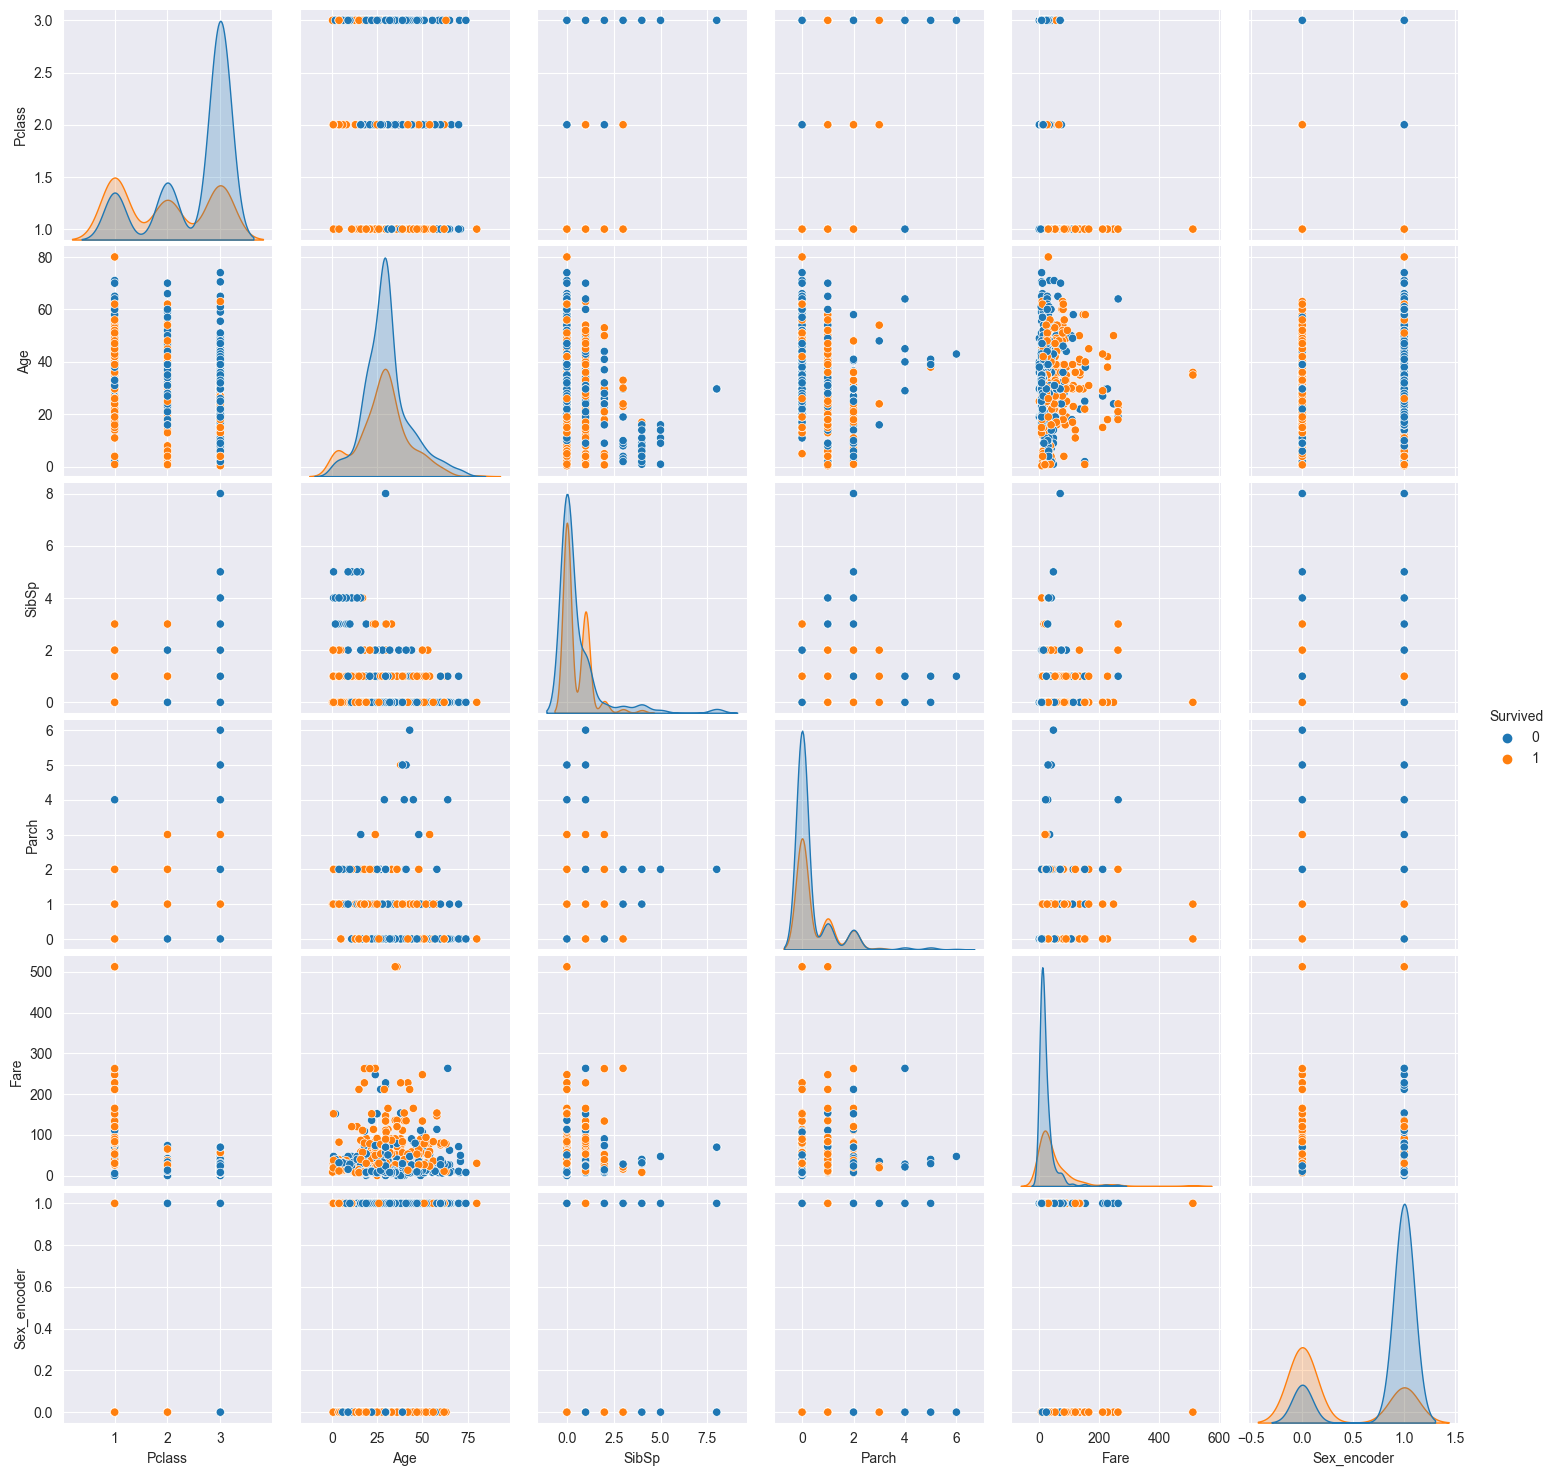

In [77]:
(
    sns.pairplot(
        data=train,
        hue='Survived',
    )
)

<AxesSubplot: xlabel='Fare', ylabel='Count'>

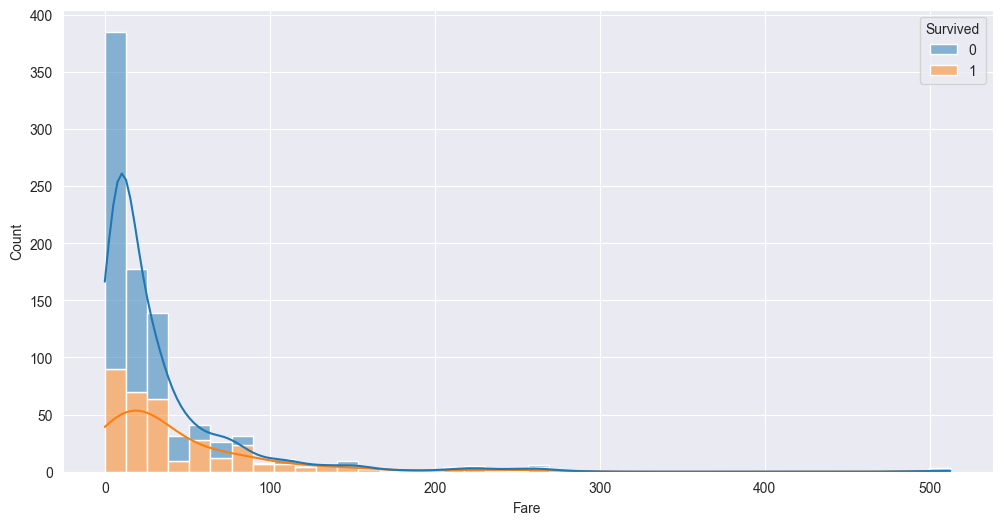

In [78]:
(
    sns.histplot(
        data=train,
        x='Fare',
        hue='Survived',
        bins=40,
        kde=True,
        multiple='stack'
    )
)

<AxesSubplot: xlabel='Age', ylabel='Count'>

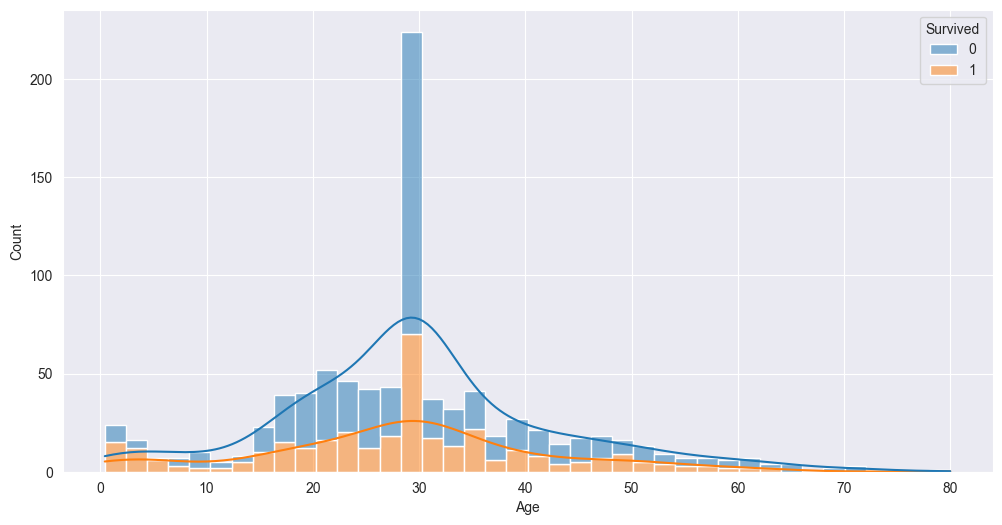

In [81]:
(
    sns.histplot(
        data=train,
        x='Age',
        hue='Survived',
        bins=40,
        kde=True,
        multiple='stack'
    )
)

<AxesSubplot: xlabel='Sex', ylabel='Count'>

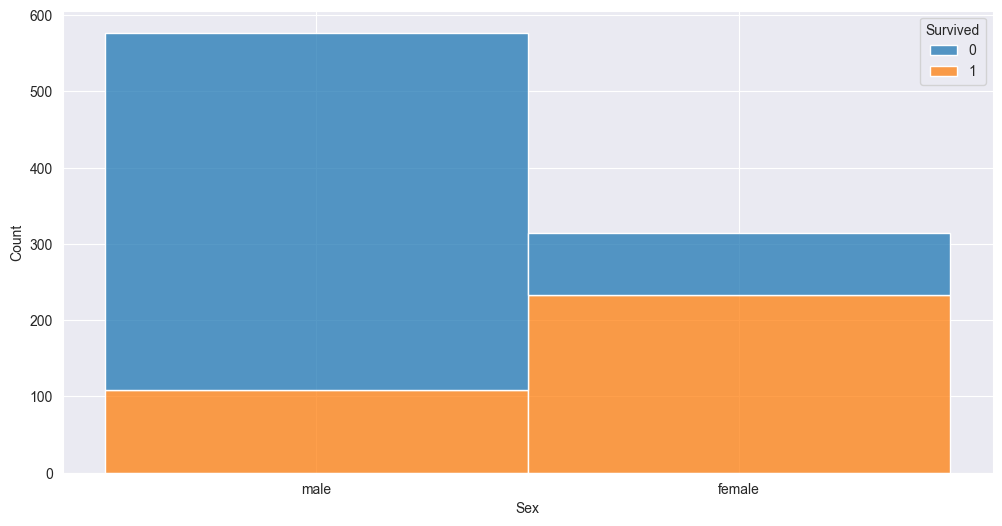

In [86]:
(
    sns.histplot(
        data=train,
        x='Sex',
        hue='Survived',
        multiple='stack'
    )
)